In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
import json

In [48]:
# Cargar datos
datos_cafe = pd.read_csv('../data_cafe/Coffee_export.csv')

# Seleccionar los datos de El Salvador
datos_elsalvador = datos_cafe[datos_cafe['Country'] == 'El Salvador'].iloc[0, 1:-1]  # Se excluye la última columna si es Total_export
datos_elsalvador.index = pd.to_datetime(datos_elsalvador.index, format='%Y')  # Asegurarse que el índice sea tipo fecha

# Convertir a serie temporal
ts_elsalvador = pd.Series(data=datos_elsalvador.values.astype('float64'), index=datos_elsalvador.index)


Verificar la estacionariedad

In [26]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller para comprobar la estacionariedad
result = adfuller(ts_elsalvador.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si el p-value es mayor a 0.05, la serie probablemente necesite diferenciación.


ADF Statistic: -0.3338379298813845
p-value: 0.9205732640672661


In [27]:
# Diferenciar la serie
ts_elsalvador_diff = ts_elsalvador.diff().dropna()

# Realizar nuevamente el test de Dickey-Fuller
result = adfuller(ts_elsalvador_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.521273668658666
p-value: 0.00017994889884359228


In [28]:
# Ajustando el modelo ARIMA
# Aquí usamos p=2, d=1, y q=2 como ejemplo. Debes ajustar estos parámetros basado en tu análisis.
model = ARIMA(ts_elsalvador, order=(2,1,2))
model_fit = model.fit()

# Imprimir el resumen del modelo
model_fit.summary()

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -532.928
Date:                Fri, 12 Apr 2024   AIC                           1075.855
Time:                        13:05:07   BIC                           1082.692
Sample:                    01-01-1990   HQIC                          1077.996
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4288      0.149     -2.885      0.004      -0.720      -0.137
ar.L2         -0.7846      0.122     -6.433      0.000      -1.024      -0.546
ma.L1          0.1699      0.201      0.845      0.398      -0.224       0.564
ma.L2          0.7344      0.196      3.753      0.000       0.351       1.118
sigma2      3.846e+14   1.17e-16   3.29e+30      0.000    3.85e+14    3.85e+14
===================================================================================
Ljung-Box (L1) (Q):                   2.38   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.12   Prob(JB):                         0.53
Heteroskedasticity (H):               0.87   Skew:                            -0.44
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.59e+47. Standard errors may be unstable.
"""

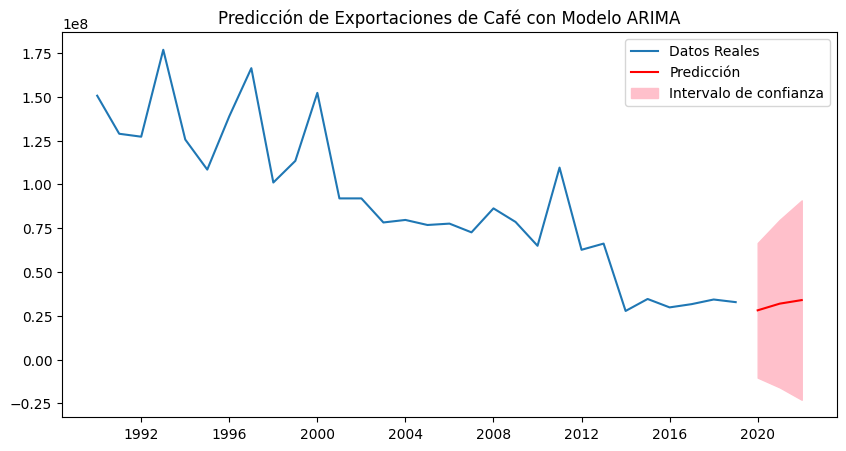

In [29]:
# Hacer predicciones
pred = model_fit.get_forecast(steps=3)  # Predicción para los próximos 3 años
pred_conf = pred.conf_int()  # Intervalos de confianza

# Graficar los resultados
plt.figure(figsize=(10,5))
plt.plot(ts_elsalvador, label='Datos Reales')
plt.plot(pred.predicted_mean.index, pred.predicted_mean, color='red', label='Predicción')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink', label='Intervalo de confianza')
plt.title('Predicción de Exportaciones de Café con Modelo ARIMA')
plt.legend()
plt.show()

In [30]:
# Seleccionar los datos de El Salvador
datos_brazil = datos_cafe[datos_cafe['Country'] == 'Brazil'].iloc[0, 1:-1]  # Se excluye la última columna si es Total_export
datos_brazil.index = pd.to_datetime(datos_brazil.index, format='%Y')  # Asegurarse que el índice sea tipo fecha

# Convertir a serie temporal
ts_brazil = pd.Series(data=datos_brazil.values.astype('float64'), index=datos_brazil.index)


Verificando la Estacionaridad

In [31]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller para comprobar la estacionariedad
result = adfuller(ts_brazil.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si el p-value es mayor a 0.05, la serie probablemente necesite diferenciación.


ADF Statistic: -1.6691141203957935
p-value: 0.4470919221865616


In [32]:
# Diferenciar la serie
ts_brazil_diff = ts_brazil.diff().dropna()

# Realizar nuevamente el test de Dickey-Fuller
result = adfuller(ts_brazil_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.196041431355993
p-value: 0.20768532488314057


In [33]:
# Ajustando el modelo ARIMA
# Aquí usamos p=2, d=1, y q=2 como ejemplo. Debes ajustar estos parámetros basado en tu análisis.
model = ARIMA(ts_brazil, order=(2,1,2))
model_fit = model.fit()

# Imprimir el resumen del modelo
model_fit.summary()

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -646.513
Date:                Fri, 12 Apr 2024   AIC                           1303.026
Time:                        13:05:27   BIC                           1309.863
Sample:                    01-01-1990   HQIC                          1305.167
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8922      0.838      1.064      0.287      -0.751       2.535
ar.L2         -0.7460      0.390     -1.914      0.056      -1.510       0.018
ma.L1         -1.3383      0.881     -1.519      0.129      -3.065       0.388
ma.L2          0.6588      0.872      0.755      0.450      -1.051       2.368
sigma2      2.136e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                69.71
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              66.65   Skew:                            -2.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.74e+54. Standard errors may be unstable.
"""

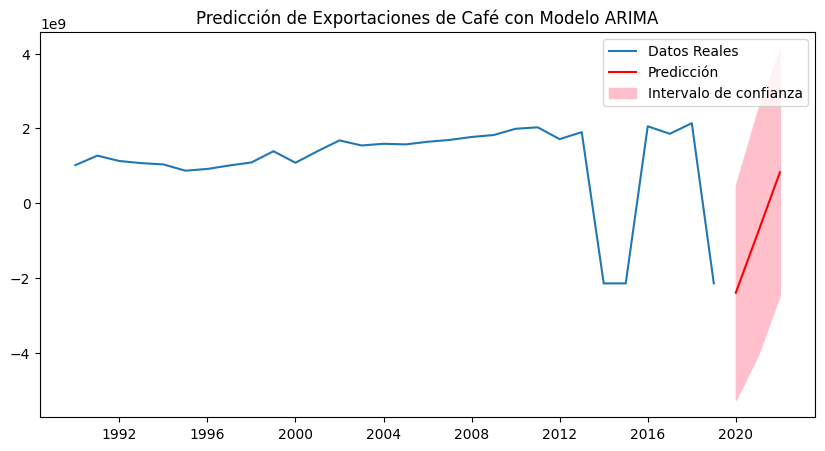

In [34]:
# Hacer predicciones
pred = model_fit.get_forecast(steps=3)  # Predicción para los próximos 3 años
pred_conf = pred.conf_int()  # Intervalos de confianza

# Graficar los resultados
plt.figure(figsize=(10,5))
plt.plot(ts_brazil, label='Datos Reales')
plt.plot(pred.predicted_mean.index, pred.predicted_mean, color='red', label='Predicción')
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink', label='Intervalo de confianza')
plt.title('Predicción de Exportaciones de Café con Modelo ARIMA')
plt.legend()
plt.show()

In [38]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


In [49]:
# Asegurarse de excluir la columna "Total_export" antes de convertir el resto en tipo fecha
if 'Total_export' in datos_cafe.columns:
    datos_cafe = datos_cafe.drop(columns=['Total_export'])

# Preparar el índice de tiempo para cada serie
datos_cafe.set_index('Country', inplace=True)
datos_cafe.columns = pd.to_datetime(datos_cafe.columns, format='%Y')

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1("Dashboard de Predicciones de Exportaciones de Café (En miles de sacos de 60kg)"),
    dcc.Dropdown(
        id='country-select',
        options=[{'label': country, 'value': country} for country in datos_cafe.index],
        value='Brazil',
        style={'width': '50%'}
    ),
    dcc.Graph(id='time-series-chart')
])

# Callback para actualizar el gráfico
@app.callback(
    Output('time-series-chart', 'figure'),
    Input('country-select', 'value')
)
def update_graph(selected_country):
    # Datos del país seleccionado
    ts_data = datos_cafe.loc[selected_country].dropna()
    
    # Ajustar modelo ARIMA
    model = ARIMA(ts_data, order=(2,1,2))
    model_fit = model.fit()
    
    # Hacer predicciones
    pred = model_fit.get_forecast(steps=3)  # Ajusta según necesidades
    pred_conf = pred.conf_int()
    
    # Crear figura
    fig = go.Figure()
    
    # Añadir datos reales
    fig.add_trace(go.Scatter(x=ts_data.index, y=ts_data, mode='lines', name='Datos Reales'))
    
    # Añadir predicciones
    fig.add_trace(go.Scatter(x=pred.predicted_mean.index, y=pred.predicted_mean, mode='lines', name='Predicciones'))
    
    # Añadir bandas de confianza
    fig.add_trace(go.Scatter(x=pred_conf.index, y=pred_conf.iloc[:, 0], mode='lines', name='Limite inferior', line=dict(width=0)))
    fig.add_trace(go.Scatter(x=pred_conf.index, y=pred_conf.iloc[:, 1], mode='lines', fill='tonexty', name='Limite superior', line=dict(width=0)))
    
    # Mejorar la presentación del gráfico
    fig.update_layout(title=f'Predicciones de Exportación de Café para {selected_country}',
                      xaxis_title='Año',
                      yaxis_title='Exportación de Café (toneladas) en sacos de 60kg',)
    return fig
# Ejecutar el servidor
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/Documentos/cafe/env/lib/python3.11/site-packages/pandas/core/indexes/base.py:3805, in Index.get_loc(
    self=Index(['Angola', 'Bolivia (Plurinational State o...Zimbabwe'],
      dtype='object', name='Country'),
    key=None
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = None
        self = Index(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cameroon', 'Central African Republic', 'Colombia', 'Congo',
       'Costa Rica', 'Côte d'Ivoire', 'Cuba', 'Democratic Republic of Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea',
       'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya',
       'Lao People's Democratic Republic', 'Liberia', 'Madagascar', 'Mal

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/Documentos/cafe/env/lib/python3.11/site-packages/pandas/core/indexes/base.py:3805, in Index.get_loc(
    self=Index(['Angola', 'Bolivia (Plurinational State o...Zimbabwe'],
      dtype='object', name='Country'),
    key=None
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = None
        self = Index(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cameroon', 'Central African Republic', 'Colombia', 'Congo',
       'Costa Rica', 'Côte d'Ivoire', 'Cuba', 'Democratic Republic of Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea',
       'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya',
       'Lao People's Democratic Republic', 'Liberia', 'Madagascar', 'Mal

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starti

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/Documentos/cafe/env/lib/python3.11/site-packages/pandas/core/indexes/base.py:3805, in Index.get_loc(
    self=Index(['Angola', 'Bolivia (Plurinational State o...Zimbabwe'],
      dtype='object', name='Country'),
    key=None
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = None
        self = Index(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cameroon', 'Central African Republic', 'Colombia', 'Congo',
       'Costa Rica', 'Côte d'Ivoire', 'Cuba', 'Democratic Republic of Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea',
       'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya',
       'Lao People's Democratic Republic', 'Liberia', 'Madagascar', 'Mal

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/Documentos/cafe/env/lib/python3.11/site-packages/pandas/core/indexes/base.py:3805, in Index.get_loc(
    self=Index(['Angola', 'Bolivia (Plurinational State o...Zimbabwe'],
      dtype='object', name='Country'),
    key=None
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = None
        self = Index(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cameroon', 'Central African Republic', 'Colombia', 'Congo',
       'Costa Rica', 'Côte d'Ivoire', 'Cuba', 'Democratic Republic of Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea',
       'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya',
       'Lao People's Democratic Republic', 'Liberia', 'Madagascar', 'Mal

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/Documentos/cafe/env/lib/python3.11/site-packages/pandas/core/indexes/base.py:3805, in Index.get_loc(
    self=Index(['Angola', 'Bolivia (Plurinational State o...Zimbabwe'],
      dtype='object', name='Country'),
    key=None
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = None
        self = Index(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cameroon', 'Central African Republic', 'Colombia', 'Congo',
       'Costa Rica', 'Côte d'Ivoire', 'Cuba', 'Democratic Republic of Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea',
       'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya',
       'Lao People's Democratic Republic', 'Liberia', 'Madagascar', 'Mal

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/charles/Documentos/cafe/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starti